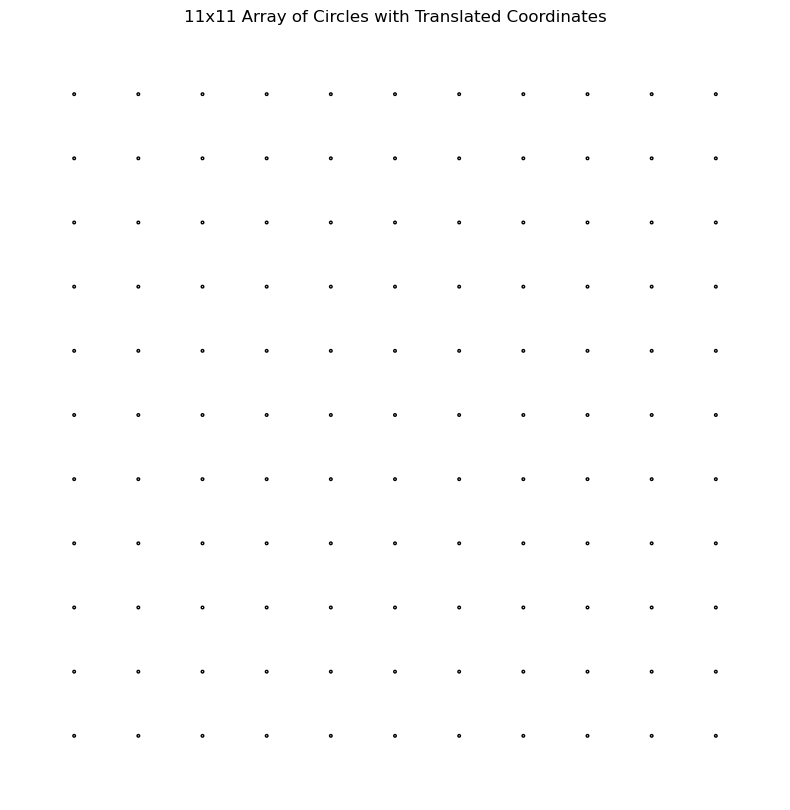

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_circle(ax, x, y, radius=0.1):
    # Draw the full circle
    circle = patches.Circle((x, y), radius, edgecolor='black', facecolor='none', linewidth=1)
    ax.add_patch(circle)

def draw_circle_array(rows=11, cols=11, spacing=0.2):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    for i in range(rows):
        for j in range(cols):
            # Initial coordinates (i, j)
            initial_x = i
            initial_y = j
            
            # Translated coordinates (x, y)
            x = initial_x * spacing
            y = initial_y * spacing
            
            draw_circle(ax, x, y)
    
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-spacing, (rows - 1) * spacing + spacing)
    ax.set_ylim(-spacing, (cols - 1) * spacing + spacing)
    ax.axis('off')
    plt.title('11x11 Array of Circles with Translated Coordinates')
    plt.show()

draw_circle_array(spacing=5)
